In [16]:
from tqdm import tqdm_notebook
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 
data = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')
max_num = 1100
min_num = 900
data['T'] = y
tag_num_tabu = []
base_score = data['T'].mean()

In [37]:
def Make_insol(sol_num):
    sol = []
    not_search = [] ## 한 조건에 같은 tag 등장 제거
    cnt = 0
    while(sol_num):
        if cnt ==0:
            d = [1,np.random.randint(50),np.random.randint(1,11)]
            sol.append(d)
            not_search.append(d[1])
            sol_num-=1
        else:
            num = np.random.randint(50)
            if num not in not_search:
                d = [np.random.randint(2),num,np.random.randint(1,11)]
                sol.append(d)
                not_search.append(d[1])
                sol_num-=1
        cnt+= 1
    return sol

In [38]:
a = Make_insol(3)

In [39]:
a

[[1, 19, 4], [0, 43, 9], [1, 46, 7]]

In [4]:
def Select_data(sol,data):
    local_data = data.copy()
    for i in range(len(sol)):
        if sol[i][0] :
            new_data = local_data[data.iloc[:,sol[i][1]] >= sol[i][2]]
        else:
            new_data = local_data[data.iloc[:,sol[i][1]] < sol[i][2]]
        local_data = new_data
    score = new_data['T'].mean()
    len_data = len(new_data)
    return score, len_data

In [52]:
a = Make_insol(3)

In [53]:
a

[[1, 1, 5], [0, 12, 4], [0, 31, 4]]

In [67]:
b = Make_neighbor_sol2(a,1000)

In [59]:
len(b)

100

In [60]:
check_nbr(b,data,0.578)

[]

In [5]:
def Make_neighbor_sol2(sol,num):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    for i in range(num):
        t = Make_insol(a)
        if t[:2] not in tag_num_tabu:
            tot_sol.append(Make_insol(a))
        
    return tot_sol

In [6]:
def good_neighbor_sol(sol,num):
    tot_sol = []
    t = sol
    a = len(sol)
    tag = []
    for i in sol:
        tag.append(i[1])
    for i in range(num):    
        for i in range(a):
            tm = Make_insol(1)[0]
            d = True
            while(d):
                if tm[1] not in tag:
                    sol[i] = tm
                    tot_sol.append(sol)
                    sol = t
                    d = False
    return tot_sol

In [ ]:
dfsdfsf

In [7]:
def Make_neighbor_sol(sol,num):
    tot_sol = []
#     tot_sol.append(sol)
    a = len(sol)
    for i in range(num):
        t = Make_insol(a)
        if t[:3] not in tag_num_tabu:
            tot_sol.append(Make_insol(a))
        
    return tot_sol

In [8]:
def Make_valneighbor(sol,num):
    tot_num_list = []
    nbr_sol = []
    tem = []
    for i in range(len(sol)):
        tem.append(sol[i][2])
    tot_num_list.append(tem)
    nbr = []
    num1 = num
    while(num) :
        num-=1
        flg = True
        cnt = 0
        while(flg):
            cnt+=1
            tem_ne = []
            for i in range(len(sol)):
                tem_ne.append(np.random.randint(1,11))
            if (tem_ne not in tot_num_list) or cnt ==5:
                flg = False
                nbr.append(tem_ne)
                tot_num_list.append(tem_ne)
                
                
                
    for i in range(num1):
        nbr_sol.append([])
     
        for j in range(len(sol)):
          
            nbr_sol[i].append([sol[j][0],sol[j][1],nbr[i][j]])
#     print(nbr_sol)
    return(nbr_sol)

In [9]:
def find_local_sol(nbr):
    
    tmsc = []
    tmso = []
    for i in nbr:
        
        a,b = Select_data(i,data)
        
        if min_num<=b<=max_num:
            tmsc.append(a)
            tmso.append(i)
    if len(tmsc):
        score = max(tmsc)
        sol = tmso[tmsc.index(score)]
        return sol
    else:return 0

In [72]:
def check_nbr(nbr, data,desire) : 
    new_nbr = []
    for i in (nbr) : 
        a, b = Select_data(i,data)
        if (a > desire) and (300<=b<=3300) :
#             print(b)
            new_nbr.append(i)
    return new_nbr

In [73]:
start = time.time()


graph_dot = []
tag_num_tabu = []

glo_sol = []
glo_scr = []
desire = base_score
for i in tqdm_notebook(range(1,6)):
    print(i)
    
    tag_num_tabu = []
    sol_l = []
    sol_s = []
    real_sol = []
    real_scr = []
    flg=True
    cnt = 0
    cnt2 = 0
    while(flg):
        cnt+=1
        print('i는',i)
        if cnt == 1:
            insol = Make_insol(i)
            glo_sol.append(insol)
            glo_scr.append(Select_data(insol,data)[0])
            nbr = Make_neighbor_sol(insol,40*(i*i))
            
        else:
            if len(sol_s):
                insol = sol_l[sol_s.index(max(sol_s))]
                nbr = Make_neighbor_sol(insol,40*(i*i))
            else : 
                insol = Make_insol(i)
                nbr = Make_neighbor_sol(insol,40*(i*i))
                
        sol_l = []
        sol_s = []
        #######여기서 nbr 열망함수 적용 
        nbr = check_nbr(nbr,data,desire)
        for j in tqdm_notebook(nbr):
            
            b_nbr = Make_valneighbor(j, 5*(i))
            b_nbr = check_nbr(b_nbr,data,desire)
            sol = find_local_sol(b_nbr)
            if sol : 
                
                a,b = Select_data(sol,data)
                graph_dot.append(a)
                sol_l.append(sol)
                sol_s.append(a)
                
        if len(sol_s):
            s = max(sol_s)
            if cnt >= 2 :
                if max(glo_scr) >= s:
                    cnt2 += 1
                    if cnt2 == 3:
                        flg =False
                else:
                    cnt2 = 0
                print(cnt2)
        else :
            continue        
        
      
        glo_sol.append(sol_l[sol_s.index(s)])
        glo_scr.append(s)
        desire = (sum(glo_scr)+base_score) / (len(glo_scr)+1)
#         print(glo_scr)

        print(max(glo_scr))
        print(glo_sol[glo_scr.index(max(glo_scr))])
print("time :", time.time() - start)

1
i는 1


0.058573185429878785
[[1, 43, 7]]
i는 1


i는 1


i는 1


1
0.058573185429878785
[[1, 43, 7]]
i는 1


i는 1


2
0.058573185429878785
[[1, 43, 7]]
i는 1


i는 1


0
0.05915071862273937
[[1, 26, 10]]
i는 1


1
0.05915071862273937
[[1, 26, 10]]
i는 1


2
0.05915071862273937
[[1, 26, 10]]
i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


i는 1


3
0.05915071862273937
[[1, 26, 10]]
2
i는 2


0.059871220541923204
[[1, 12, 10], [1, 44, 6]]
i는 2


1
0.059871220541923204
[[1, 12, 10], [1, 44, 6]]
i는 2


0
0.06341464968738354
[[1, 40, 5], [1, 16, 7]]
i는 2


i는 2


1
0.06341464968738354
[[1, 40, 5], [1, 16, 7]]
i는 2


2
0.06341464968738354
[[1, 40, 5], [1, 16, 7]]
i는 2


3
0.06341464968738354
[[1, 40, 5], [1, 16, 7]]
3
i는 3


0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 3


1
0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 3


2
0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 3


3
0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
4
i는 4


0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 4


1
0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 4


2
0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 4


3
0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
5
i는 5


0.06759811222631548
[[1, 43, 7], [1, 27, 10], [1, 38, 10]]
i는 5


i는 5


i는 5


i는 5


i는 5


i는 5


i는 5


i는 5


i는 5


i는 5


i는 5


KeyboardInterrupt: 

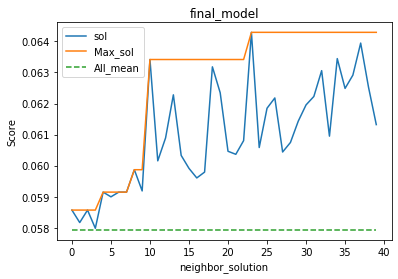

In [74]:
q_plot = []
x_plot = []
max_plt = []
mean_plt=[]
for i in range(len(graph_dot)):
    q_plot.append(graph_dot[i])
    x_plot.append(i)
    max_plt.append(max(q_plot))
    mean_plt.append(0.05793219386042783)
plt.figure()
plt.plot(x_plot, q_plot,label = 'sol')
plt.plot(x_plot, max_plt, label = 'Max_sol')
plt.plot(x_plot, mean_plt,label = 'All_mean',linestyle = '--')

plt.xlabel('neighbor_solution')
plt.ylabel('Score')
plt.title('final_model')
plt.legend()
plt.show()

In [47]:
for i in range(len(glo_sol)):
    
    str_a = ''
    str_tm = ''
    a,b = Select_data(glo_sol[i],data)
    for j in range(len(glo_sol[i])):
        q = glo_sol[i][j]
        
        t = ''
        if q[0]==1:
            t = '*'
        else:
            t = '-'
        str_tm+= t
        str_tm+=' ['
        str_tm+='D'
        str_tm+= str(q[1])
        str_tm+= ' , '
        str_tm+= str(q[2])
        str_tm+='] '
    str_a += str_tm
    print('     스코어 : ',round(a,5),      '     NTU:', b,'       해 : '  ,str_a, )

     스코어 :  0.05793      NTU: 100000        해 :  * [D29 , 1] 
     스코어 :  0.05857      NTU: 1069        해 :  * [D43 , 7] 
     스코어 :  0.059      NTU: 1082        해 :  * [D28 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05915      NTU: 1050        해 :  * [D26 , 10] 
     스코어 :  0.05667      NTU: 18800        해 :  * [D20 , 8] - [D24 , 7] 
     스코어 :  0.06117      NTU: 983        해 :  * [D17 , 8] * [D30 , 9] 
     스코어 :  0.05948      NTU: 918        해 :  * [D16 , 8] * [D17 , 7] 
     스코어 :  0.0625      NTU: 1068        해 :  * [D15 , 10] * [D30 , 2] 
     스코어 :  0.05965      NTU: 987        해 :  * [D24 , 2] * [D15 , 7] 
     스코어 :  0.05952      NTU: 1084        해 :  * [D11 , 7] * [D42 , 9] 
     스코어 :  0.05952      NTU: 973        해 :  * [D24 , 7] * [D4 , 6] 
     스코어 :  0.05596      NTU: 1529        해 :  * [D18 , 7] * [D10 , 3] - [D